In [ ]:
!wget -c http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2023-10-08 00:52:53--  http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.83.102, 52.216.38.8, 52.217.122.232, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.83.102|:80... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
import numpy as np
import random
import os
import matplotlib

In [ ]:
from tensorflow.keras import layers
image_in = layers.Input(shape=(150,150,3))

In [ ]:
x = layers.Conv2D(16, 3, activation='relu')(image_in)
x = layers.MaxPooling2D(2)(x)

In [ ]:
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [ ]:
from tensorflow.keras.regularizers import l2
x = layers.Flatten()(x)
x = layers.Dense(512,activation='relu', kernel_regularizer=l2(0.01))(x)

In [ ]:
output = layers.Dense(1,activation='sigmoid')(x)

In [ ]:
from tensorflow.keras.models import Model
my_model= Model(image_in,output)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers
my_model.compile(loss='binary_crossentropy',optimizer=RMSprop(0.001),metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_data = ImageDataGenerator(rescale=1./255)

In [ ]:
import os
import zipfile
import requests
from tensorflow.keras.preprocessing.image import ImageDataGenerator

url = "http://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip"

response = requests.get(url)


with open('Cat_Dog_data.zip', 'wb') as file:
    file.write(response.content)


with zipfile.ZipFile('Cat_Dog_data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

train_dir = 'data/Cat_Dog_data/train'

training_dataset = training_data.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 22500 images belonging to 2 classes.


In [ ]:
testing_dir = 'data/Cat_Dog_data/test'

validation_dataset = training_data.flow_from_directory(testing_dir,target_size=(150,150),batch_size=20,class_mode='binary')


Found 2500 images belonging to 2 classes.


In [ ]:
H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=30,validation_data=validation_dataset, validation_steps=50, verbose=2)

<ipython-input-21-dc5fdd7b0e58>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = my_model.fit_generator(training_dataset, steps_per_epoch=100, epochs=30,validation_data=validation_dataset, validation_steps=50, verbose=2)


Epoch 1/30
100/100 - 83s - loss: 1.7827 - acc: 0.5510 - val_loss: 0.6778 - val_acc: 0.5810 - 83s/epoch - 831ms/step
Epoch 2/30
100/100 - 74s - loss: 0.6882 - acc: 0.5665 - val_loss: 0.6723 - val_acc: 0.6240 - 74s/epoch - 742ms/step
Epoch 3/30
100/100 - 76s - loss: 0.6807 - acc: 0.5930 - val_loss: 0.6602 - val_acc: 0.6720 - 76s/epoch - 760ms/step
Epoch 4/30
100/100 - 73s - loss: 0.6725 - acc: 0.6315 - val_loss: 0.6644 - val_acc: 0.6150 - 73s/epoch - 731ms/step
Epoch 5/30
100/100 - 82s - loss: 0.6455 - acc: 0.6625 - val_loss: 0.6353 - val_acc: 0.7030 - 82s/epoch - 823ms/step
Epoch 6/30
100/100 - 73s - loss: 0.6437 - acc: 0.6730 - val_loss: 0.6198 - val_acc: 0.6990 - 73s/epoch - 732ms/step
Epoch 7/30
100/100 - 71s - loss: 0.6352 - acc: 0.6625 - val_loss: 0.6209 - val_acc: 0.6660 - 71s/epoch - 708ms/step
Epoch 8/30
100/100 - 66s - loss: 0.6298 - acc: 0.6730 - val_loss: 0.6413 - val_acc: 0.6920 - 66s/epoch - 663ms/step
Epoch 9/30
100/100 - 71s - loss: 0.6165 - acc: 0.6870 - val_loss: 0.6117

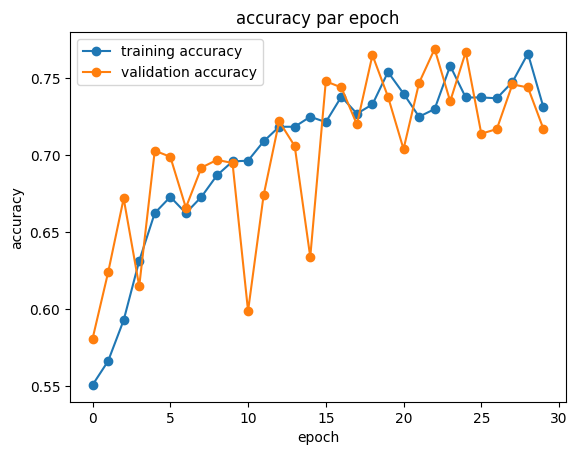

In [ ]:
import matplotlib.pyplot as plt


plt.plot(H.history['acc'], label='training accuracy', marker='o')
plt.plot(H.history['val_acc'], label='validation accuracy', marker='o')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('accuracy par epoch')
plt.legend()

plt.show()


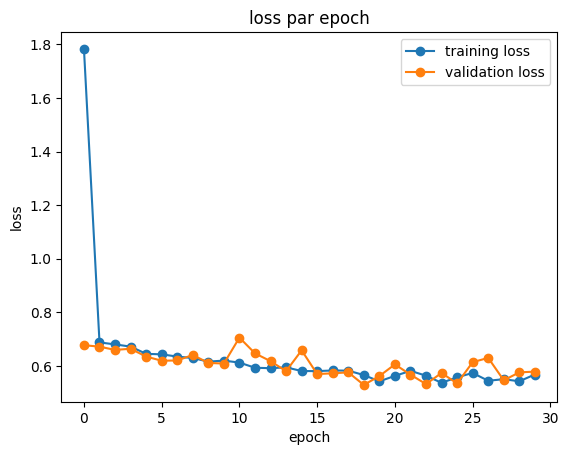

In [ ]:
plt.plot(H.history['loss'], label='training loss', marker='o')
plt.plot(H.history['val_loss'], label='validation loss', marker='o')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('loss par epoch')
plt.legend()

plt.show()


In [ ]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.5).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 21s 167ms/step
Nombre de chats : [850]Nombre de chiens : [1650]


In [ ]:
predictions = my_model.predict(validation_dataset)
binary_predictions = (predictions > 0.8).astype(int)
cats= sum(binary_predictions == 0)
dogs= sum(binary_predictions == 1)
print("Nombre de chats : " + str(cats) + "Nombre de chiens : " + str(dogs))

125/125 [==============================] - 23s 181ms/step
Nombre de chats : [1684]Nombre de chiens : [816]
